In [17]:
import json
import wikipediaapi # pip install wikipedia-api
import pandas as pd

In [18]:
wiki = wikipediaapi.Wikipedia('RandomScrapper', 'en')

In [8]:
# Generate ten page titles randomly to scrap from wikipedia. Titles should be various topics.
titles = [
    'Bank for International Settlements',
    'United States',
    'Machine Learning',
    'Data Science',
    'Artificial Intelligence',
    'Global financial system',
    'Financial crisis',
    'Travel',
    'Economics',
    'Marathon'
]

In [11]:
# scrap text from wikipedia for each title
texts = []
for title in titles:
    page = wiki.page(title)
    if page.exists():
        texts.append(
            {'title': title, 'text': page.text, 'url': page.fullurl}
        )
    else:
        print(f'{title} does not exist on wikipedia')

In [13]:
df = pd.DataFrame(texts)

In [20]:
df.head()

,title,text,url
0,Bank for International Settlements,The Bank for International Settlements (BIS) i...,https://en.wikipedia.org/wiki/Bank_for_Interna...
1,United States,"The United States of America (USA), commonly k...",https://en.wikipedia.org/wiki/United_States
2,Machine Learning,Machine learning (ML) is a field of study in a...,https://en.wikipedia.org/wiki/Machine_learning
3,Data Science,Data science is an interdisciplinary academic ...,https://en.wikipedia.org/wiki/Data_science
4,Artificial Intelligence,"Artificial intelligence (AI), in its broadest ...",https://en.wikipedia.org/wiki/Artificial_intel...


<Axes: title={'center': 'Number of words in each article'}>

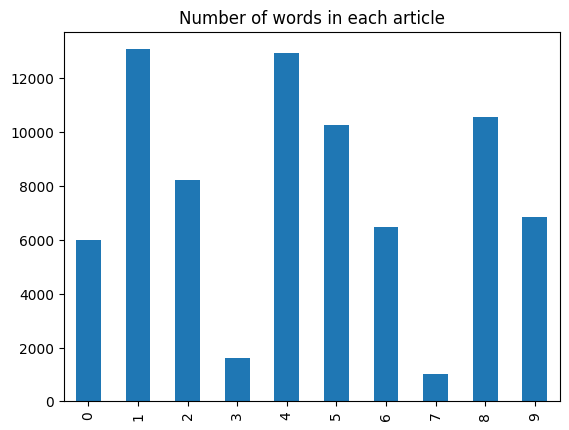

In [15]:
df.text.apply(lambda x: len(x.split())).plot(kind='bar', title='Number of words in each article')

In [19]:
json.dump(texts, open('wikipedia_10pages.json', 'wt',encoding='utf-8'))